In [0]:
#Regressão Logística e Binary Cross Entropy

In [0]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from torch.autograd import Variable

In [0]:
#PREPARAÇÃO DA DATA
x_numpy = np.array([5,7,2,9,4,10,9,4,6,1])
y_numpy = np.array([1,1,0,1,0,1,1,0,1,0])

torch.Size([10, 1])
torch.Size([10, 1])


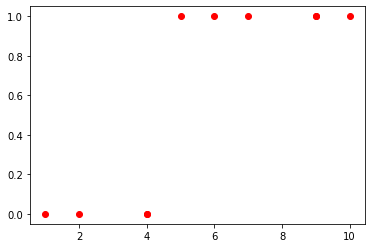

In [6]:
#CONVERTER DO DADO NUMPY PARA DADO TENSOR
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
x = x.view(x.shape[0], 1)

print(x.shape)
print(y.shape)
plt.plot(x_numpy,y_numpy,'ro')


In [0]:
#CLASS DE REGRESSÃO LOGÍSTICA

class RegressaoLogistica(nn.Module):
  def __init__(self,n_input,n_output):
    super(RegressaoLogistica, self).__init__()
    self.Linear = nn.Linear(n_input, 1)
  
  def forward(self,x):
    y_hat = torch.sigmoid(self.Linear(x))
    return y_hat


In [0]:
#DEFINIÇÃO DO MODELO
input_size = 1
output_size = 1
model = RegressaoLogistica(1,1)


In [14]:
#DEFINIÇÃO DA FUNÇÃO DE CUSTO E OTIMIZADOR
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model.parameters())

<generator object Module.parameters at 0x7f87670daca8>


In [0]:
#LOOP  DE TREINAMENTO
num_epochs = 200
contador_custo = []
for epoch in range (num_epochs):
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

GRÁFICO DA FUNÇÃO DE CUSTO


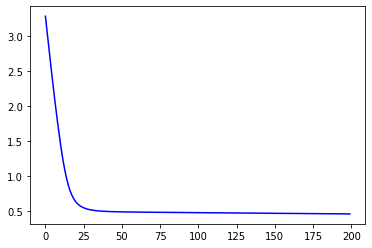

In [23]:
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [28]:
#Fazer predição de test
teste = np.array([2,3,6,7,8])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

with torch.no_grad():
  predicoes = model(t_teste)
  for x,y in zip(t_teste, predicoes):
    status = ""
    if(y>=0.8):
      status = "aprovado"
    else:
      status = "reprovado"
    
    print('x: {:.2f} | ŷ: {:.2f} |'.format(x.detach().item(),y.detach().item()), status)

x: 2.00 | ŷ: 0.53 | reprovado
x: 3.00 | ŷ: 0.59 | reprovado
x: 6.00 | ŷ: 0.77 | reprovado
x: 7.00 | ŷ: 0.82 | aprovado
x: 8.00 | ŷ: 0.85 | aprovado
